In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataport.xlsx')
data2 = pd.read_excel('all-cars.xls')

# Data visualisation

In [3]:
data2

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180


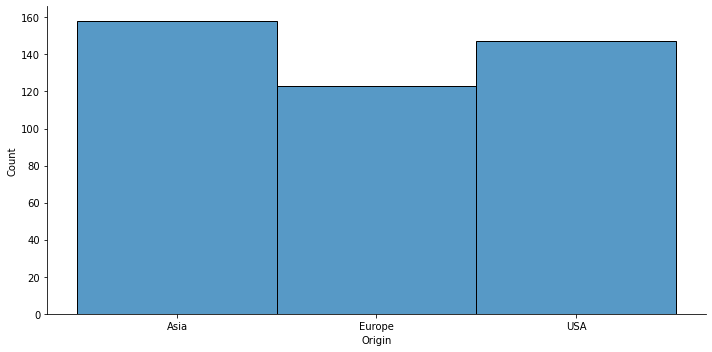

In [42]:
 sns.displot(data2["Origin"],height=5,aspect=2)


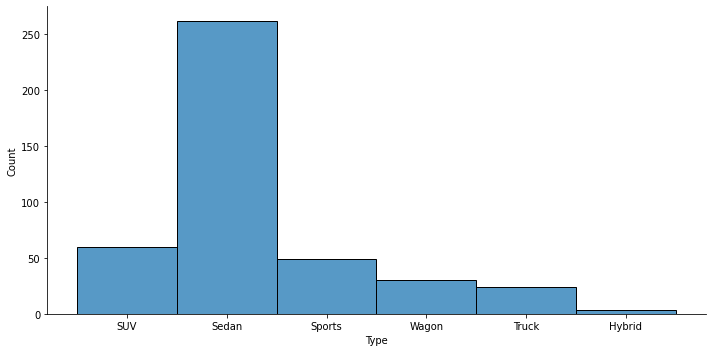

In [43]:
 sns.displot(data2["Type"],height=5,aspect=2)

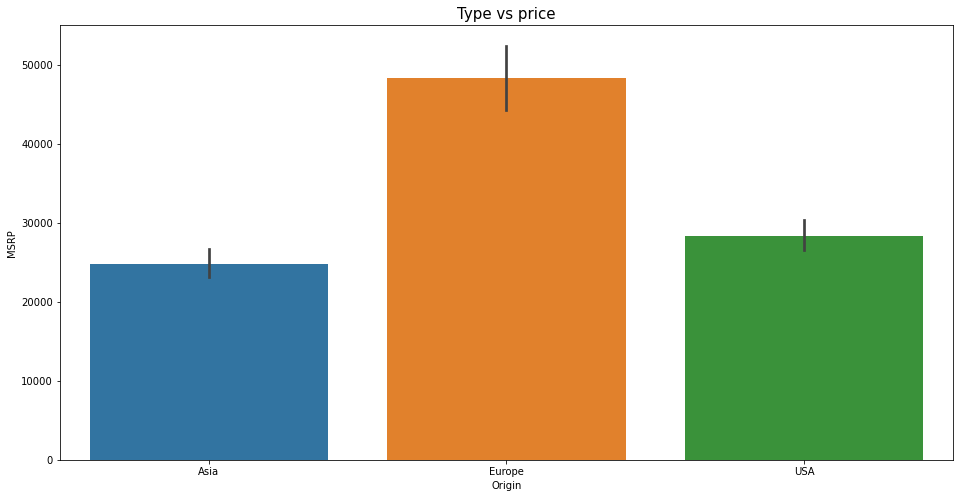

In [44]:
"""df["is_basement"] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
basement_df = df[["is_basement", "price"]].groupby(by = "is_basement", as_index = False)
basement_df = basement_df.mean()"""
bar=sns.barplot(x = "Origin", y = "MSRP", data = data2)
bar.set_title("Type vs price", fontsize = 15)
bar.figure.set_size_inches(16,8)

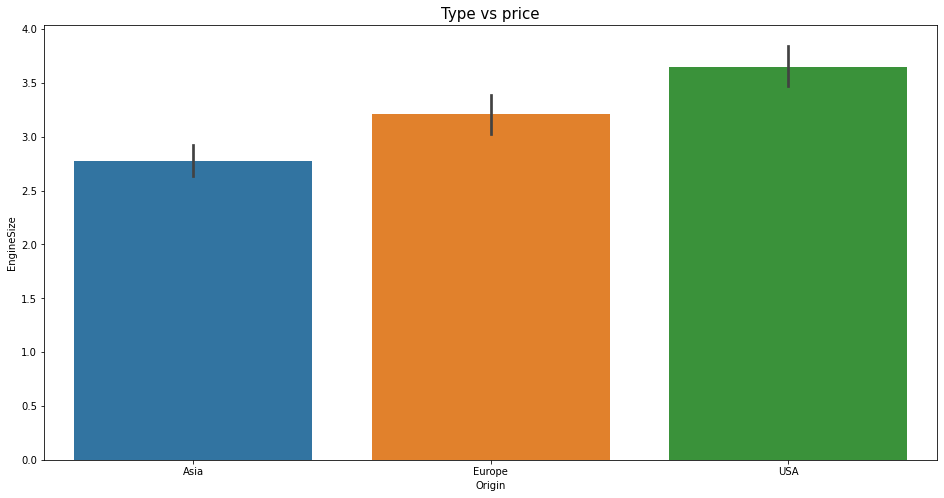

In [47]:
bar=sns.barplot(x = "Origin", y = "EngineSize", data = data2)
bar.set_title("Type vs price", fontsize = 15)
bar.figure.set_size_inches(16,8)

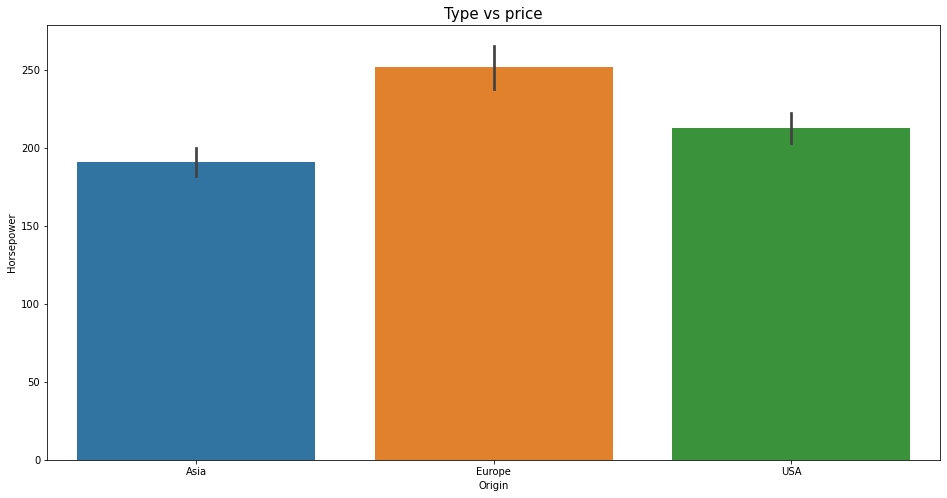

In [48]:
bar=sns.barplot(x = "Origin", y = "Horsepower", data = data2)
bar.set_title("Type vs price", fontsize = 15)
bar.figure.set_size_inches(16,8)

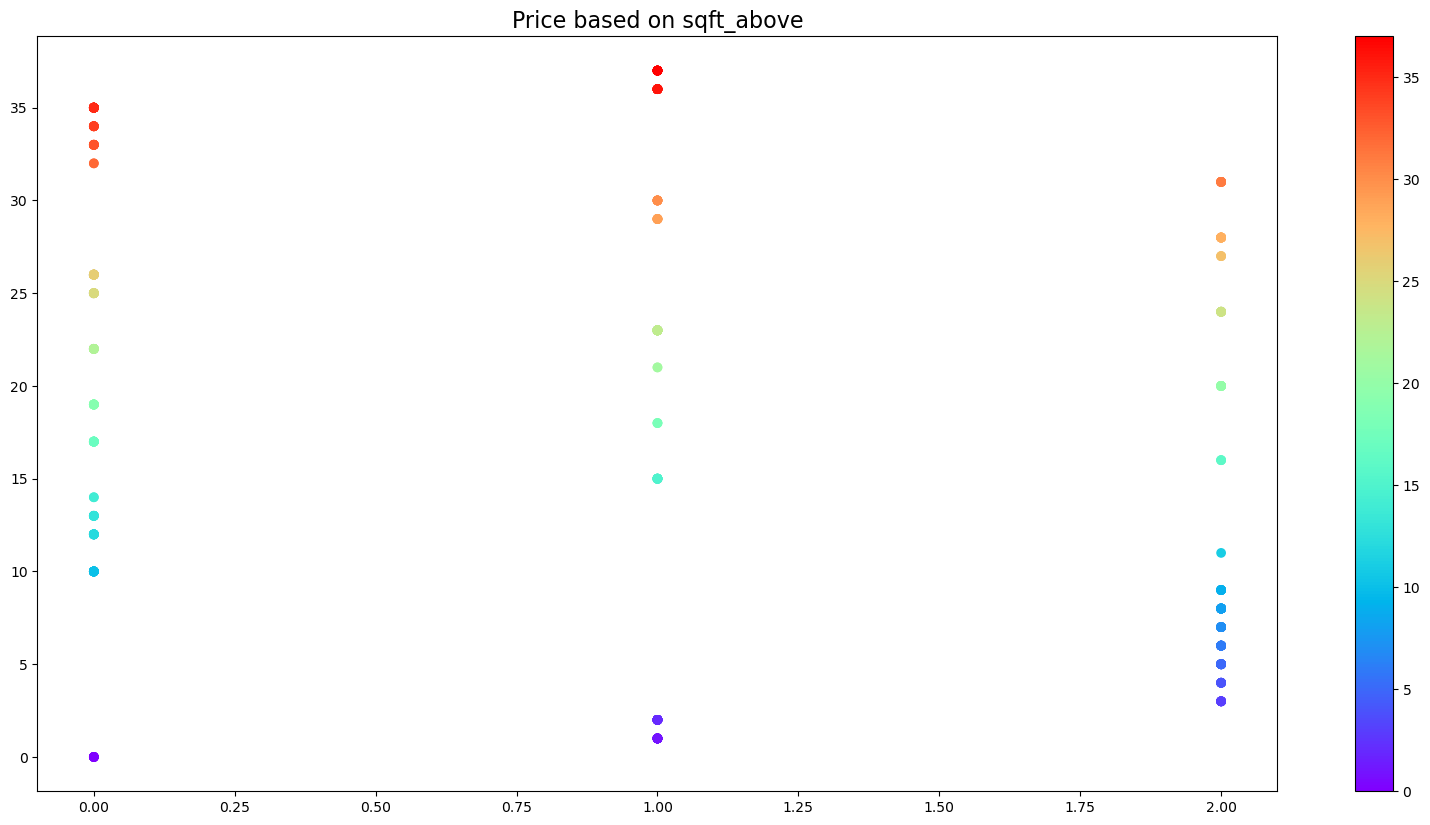

In [82]:
x = data2['Origin']
y =  data2['Make']
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='rainbow')
plt.colorbar()
plt.title("Price based on sqft_above",fontsize = 16)
plt.show()

**Data cleaning**

In [4]:
data

,importateur,jan,fev,mars,avr,mai,juin,juillet,out,sept,oct,nov,dec,nbmarque,nbagenceoff,origine,type
0,ADEV SARL,190,22,285,484,238,19,335,189,240,73,227,45,1,1,asiatique,S
1,AFRIQUE AUTO,385,481,601,491,220,398,488,602,933,214,451,156,2,1,american,S
2,ALPHA FORD,206,271,625,569,1057,980,1187,276,677,905,566,191,1,2,american,S
3,ALPHA HYUNDAI MOTOR,25,22,431,284,400,646,494,540,478,1064,425,73,1,4,asiatique,S
4,ALPHA INTER,23,22,25,28,25,29,68,41,13,14,58,16,2,2,european,S
5,ARTES,876,1223,4267,2361,2716,1676,1288,1548,865,852,736,464,2,2,european,B
6,AURES AUTO CITROENE,530,1306,1770,1327,2261,2090,2329,1083,1209,1126,650,527,2,6,european,B
7,BSB,283,54,131,344,714,972,522,794,698,643,673,205,1,7,asiatique,S
8,CITY CARS,35,1054,1653,835,613,379,1256,737,693,642,572,850,1,12,asiatique,S
9,ECONOMIC AUTO,279,137,48,196,157,150,527,399,399,307,295,261,1,8,asiatique,S


In [6]:
data2.head(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183


In [7]:
data2.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [8]:
data2['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [9]:
data2['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [10]:
data2.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [11]:
categorical_feature_mask = data2.dtypes==object

In [12]:
categorical_feature_mask

Make            True
Model           True
Type            True
Origin          True
DriveTrain      True
MSRP           False
Invoice        False
EngineSize     False
Cylinders      False
Horsepower     False
MPG_City       False
MPG_Highway    False
Weight         False
Wheelbase      False
Length         False
dtype: bool

In [13]:
categorical_cols = data2.columns[categorical_feature_mask].tolist()

In [14]:
categorical_cols

['Make', 'Model', 'Type', 'Origin', 'DriveTrain']

In [15]:
LE =LabelEncoder()

In [16]:
data2[categorical_cols] = data2[categorical_cols].apply(lambda col: LE.fit_transform(col))

In [17]:
pd.isnull(data2).sum() > 0


Make           False
Model          False
Type           False
Origin         False
DriveTrain     False
MSRP           False
Invoice        False
EngineSize     False
Cylinders       True
Horsepower     False
MPG_City       False
MPG_Highway    False
Weight         False
Wheelbase      False
Length         False
dtype: bool

In [18]:
data2['Cylinders'] = data2['Cylinders'].fillna(data2['Cylinders'].mean())

In [19]:
Y = data2['Origin']
X = data2.drop('Origin',axis = 1)

In [20]:
X_train, X_test, y_train, y_test =train_test_split(X, Y,test_size=0.3, random_state=2)

**Feature engineering**

In [21]:
from sklearn.model_selection import GridSearchCV

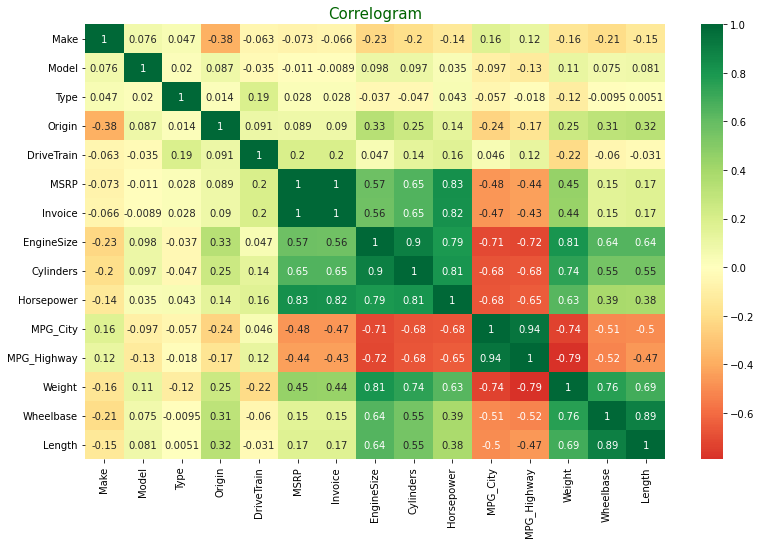

In [22]:
# Quantify correlations
corr = data2.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# Modeling

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score, f1_score


rfc_model = RandomForestClassifier()
gbc_model = GradientBoostingClassifier()
hgbr_model = HistGradientBoostingClassifier()
lr_model = LogisticRegression()
knnc_model = KNeighborsClassifier(11)
lgbmc_model = LGBMClassifier()
xgbc_model = XGBClassifier(n_estimators=200,max_depth=6)

models = [knnc_model,rfc_model,gbc_model,hgbr_model,lr_model,lgbmc_model,xgbc_model]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    #f1_sc = f1_score(y_test,y_pred)
    print(model.__class__.__name__,': ',accuracy)

KNeighborsClassifier :  0.5193798449612403
RandomForestClassifier :  0.9069767441860465
GradientBoostingClassifier :  0.9689922480620154
HistGradientBoostingClassifier :  0.8837209302325582
LogisticRegression :  0.627906976744186
LGBMClassifier :  0.9534883720930233
[23:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier :  0.9612403100775194


In [33]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knnc_model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [34]:
print(grid_search.best_params_)

{'n_neighbors': 11}


# Modeling / PCA

In [72]:
def data_processing():
    cars = pd.read_excel('all-cars.xls')
    categorical_feature= cars.dtypes==object
    categorical_columns = cars.columns[categorical_feature].tolist()
    LE =LabelEncoder()
    cars[categorical_columns] = cars[categorical_columns].apply(lambda col: LE.fit_transform(col))
    cars['Cylinders'] = cars['Cylinders'].fillna(data2['Cylinders'].mean())
    return cars

In [73]:
cars = data_processing()

In [74]:
YC = cars['Origin']
XC= cars.drop(['Origin','Model','Type','DriveTrain','Invoice','MPG_City','MPG_Highway'],axis = 1)

In [75]:
XC

,Make,MSRP,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length
0,0,36945,3.5,6.0,265,4451,106,189
1,0,23820,2.0,4.0,200,2778,101,172
2,0,26990,2.4,4.0,200,3230,105,183
3,0,33195,3.2,6.0,270,3575,108,186
4,0,43755,3.5,6.0,225,3880,115,197
...,...,...,...,...,...,...,...,...
423,37,40565,2.4,5.0,197,3450,105,186
424,37,42565,2.3,5.0,242,3450,105,186
425,37,45210,2.9,6.0,268,3653,110,190
426,37,26135,1.9,4.0,170,2822,101,180


In [76]:
X_trainC, X_testC, y_trainC, y_testC =train_test_split(XC, YC,test_size=0.3, random_state=2)

In [77]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import accuracy_score, f1_score


rfc_model = RandomForestClassifier()
gbc_model = GradientBoostingClassifier()
hgbr_model = HistGradientBoostingClassifier()
lr_model = LogisticRegression()
knnc_model = KNeighborsClassifier(n_neighbors=1)
lgbmc_model = LGBMClassifier()
xgbc_model = XGBClassifier(n_estimators=200,max_depth=6)

models = [knnc_model,rfc_model,gbc_model,hgbr_model,lr_model,lgbmc_model,xgbc_model]

for model in models:
    model.fit(X_trainC,y_trainC)
    y_pred = model.predict(X_testC)
    accuracy = accuracy_score(y_testC,y_pred)
    #f1_sc = f1_score(y_test,y_pred)
    print(model.__class__.__name__,': ',accuracy)

KNeighborsClassifier :  0.4186046511627907
RandomForestClassifier :  0.8682170542635659
GradientBoostingClassifier :  0.9767441860465116
HistGradientBoostingClassifier :  0.9224806201550387
LogisticRegression :  0.5813953488372093
LGBMClassifier :  0.9689922480620154
[23:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier :  0.9767441860465116
